In [1]:
## Importing all the requried packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from IPython.display import HTML
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls'/content/drive/MyDrive/Project'

Exploring_Automobile_Market_Trends_and_Insights_from_Car_Data.ipynb
vehicles_cleaned.csv
vehicles.csv


In [4]:
## Setting the file path for the raw data

## These are to be changed as per the destination file.

file = "/content/drive/MyDrive/Project/vehicles.csv"
file_cleaned = "/content/drive/MyDrive/Project/vehicles_cleaned.csv"

In [5]:
## Loading the Data set for further analysis

df = pd.read_csv(file)

# Exploratory Data Analysis and Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
## Cleaning all the un necessary columns from the data set

df.drop(["url", "region_url", "image_url", "lat", "long", "VIN", "posting_date", "county", "description"], axis=1, inplace=True)

In [8]:
## Checking if all the irrelevant columns are removed from the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [9]:
## Checking the number of errors in the dataframe

df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [10]:
## We are dropping all the errors mentioned above from our dataframe, so that we can perform any further analysis on clean data.
df = df.dropna()

## We are checking if there are any errors we need to concern ourselves with.
df.info()

df.isnull().sum()

df = df.set_index("id")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79195 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            79195 non-null  int64  
 1   region        79195 non-null  object 
 2   price         79195 non-null  int64  
 3   year          79195 non-null  float64
 4   manufacturer  79195 non-null  object 
 5   model         79195 non-null  object 
 6   condition     79195 non-null  object 
 7   cylinders     79195 non-null  object 
 8   fuel          79195 non-null  object 
 9   odometer      79195 non-null  float64
 10  title_status  79195 non-null  object 
 11  transmission  79195 non-null  object 
 12  drive         79195 non-null  object 
 13  size          79195 non-null  object 
 14  type          79195 non-null  object 
 15  paint_color   79195 non-null  object 
 16  state         79195 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 10.9+ MB


In [11]:
## We are removing the outliers from the data set based on the price of the vehicle.

df = df[(df["price"] != 0) & (df["price"] > 200) & (df["price"] < 1000000)]

From the above, we have established "Price" of the vehicle as the base criteria and have then proceeded to remove any outliers, meaning observations which are priced more than $ 1 Million or less than $ 200, both of which are improbable considering this is a data pull from Craiglist. 

In [12]:
# Improving the legibility of the observations
df["manufacturer"] = df["manufacturer"].str.title()
df["region"] = df["region"].str.title()
df["model"] = df["model"].str.title()
df["condition"] = df["condition"].str.title()
df["fuel"] = df["fuel"].str.title()
df["title_status"] = df["title_status"].str.title()
df["transmission"] = df["transmission"].str.title()
df["drive"] = df["drive"].str.upper()
df["size"] = df["size"].str.title()
df["type"] = df["type"].str.title()
df["paint_color"] = df["paint_color"].str.title()
df["state"] = df["state"].str.upper()


df["Age"] = 2023 - df["year"]


df.to_csv(file_cleaned)

# Analysis Questions

## What are the most popular makes and models of vehicles ?

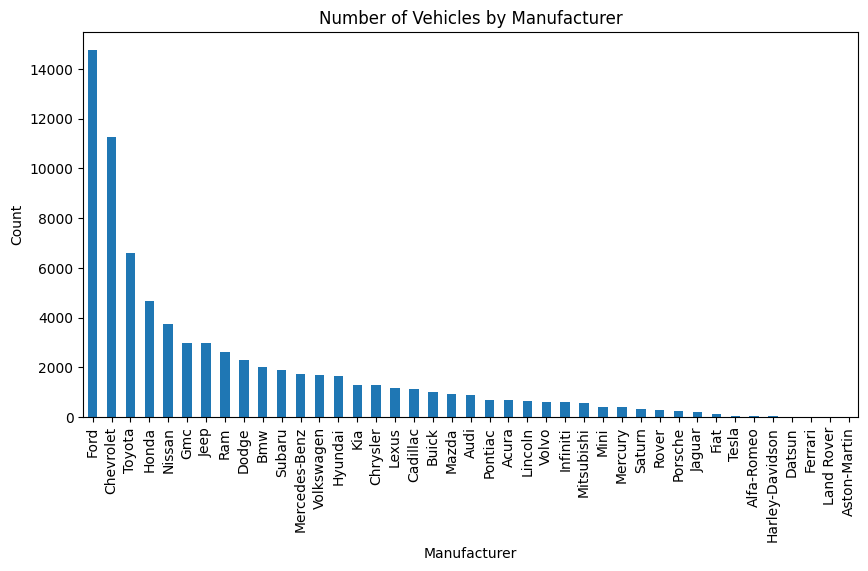

In [13]:
ax = df["manufacturer"].value_counts().plot.bar(figsize=(10, 5))
ax.set(title="Number of Vehicles by Manufacturer", xlabel="Manufacturer", ylabel="Count")
plt.xticks(rotation=90)
plt.show()

As we can see above, from the data that we have, we can see that "Ford" is the most popular manufacturer of all. Now, let's see if we can identify the most popular vehicle from Ford.

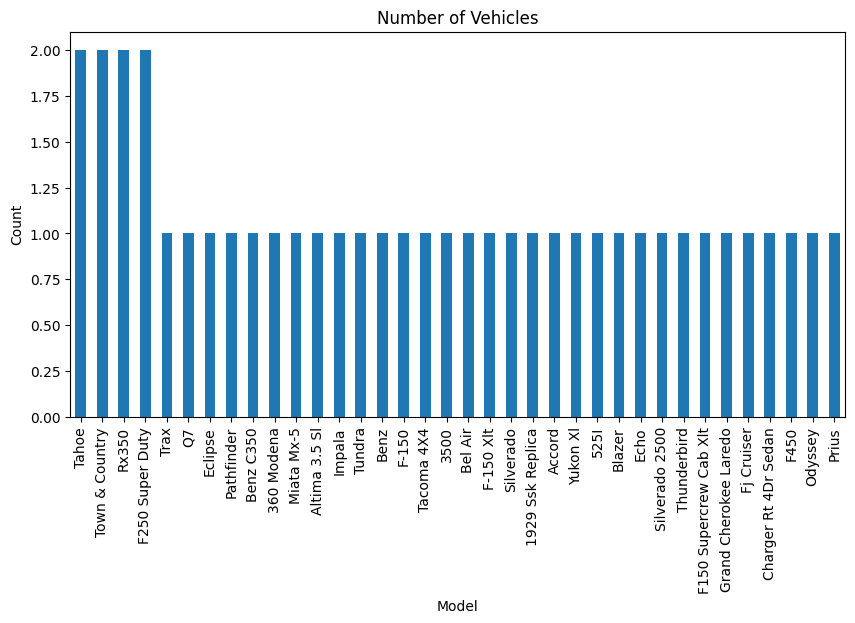

In [14]:
ax = df["model"].head(40).value_counts().plot.bar(figsize=(10, 5))
ax.set(title="Number of Vehicles", xlabel="Model", ylabel="Count")
plt.xticks(rotation=90)
plt.show()

From the above, we can say that **Tahoe**, which is made by Chevrolet, is the most popular vehicle from the above dataset.

## Are there any notable differences in pricing or demand between different regions of the country ?

<ipython-input-15-792fefd204a5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])


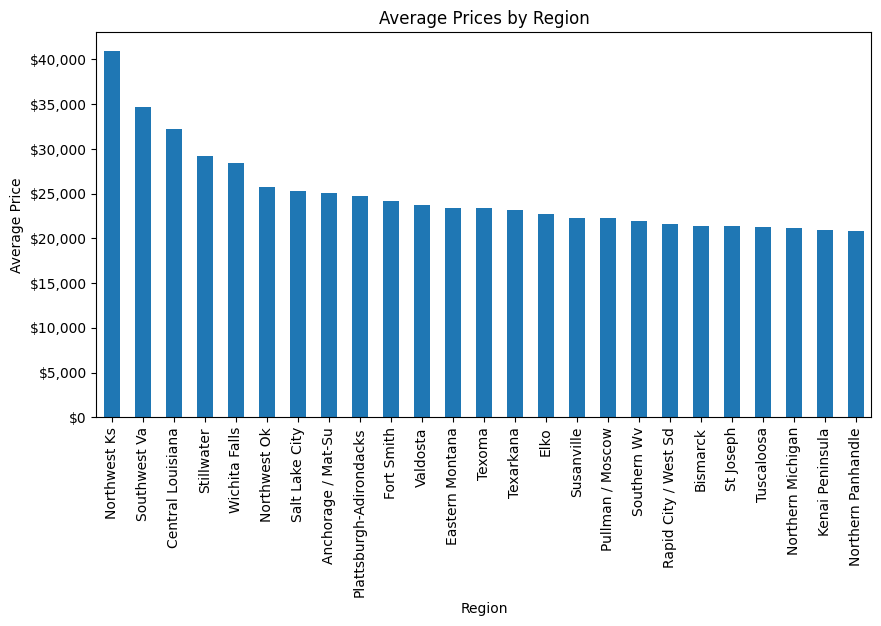

In [15]:
avg_prices = df.groupby("region")["price"].mean().sort_values(ascending=False)[:25]
ax = avg_prices.plot.bar(figsize=(10, 5))
ax.set(title="Average Prices by Region", xlabel="Region", ylabel="Average Price")
plt.xticks(rotation=90)
ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])
plt.show()

From the above plot, we can say that **Northwest Ks** is the most expensive place to buy any vehicle, since this region has the highest average price for the vehicles sold at around **$40,000**

<ipython-input-16-b65d3741be1c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])


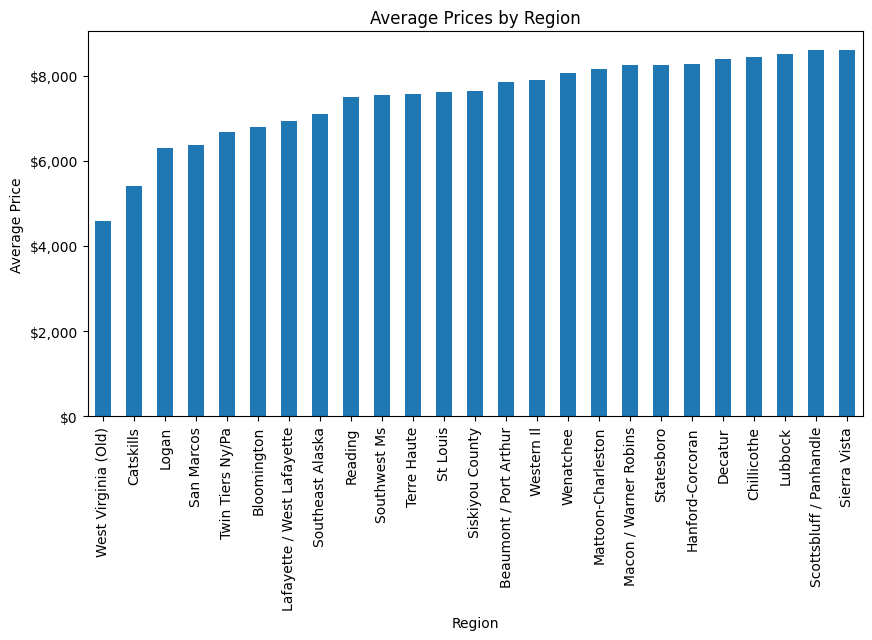

In [16]:
avg_prices = df.groupby("region")["price"].mean().sort_values(ascending=True)[:25]
ax = avg_prices.plot.bar(figsize=(10, 5))
ax.set(title="Average Prices by Region", xlabel="Region", ylabel="Average Price")
ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])
plt.xticks(rotation=90)
plt.show()

From the above plot, we can say that **West Virginia (Old)** is the least expensive place to buy any vehicle, since this region has the lowest average price for the vehicles sold at **$4,300**

## Are there any correlations between the age of the vehicle and it's price ?

<ipython-input-17-df1836b686bf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])


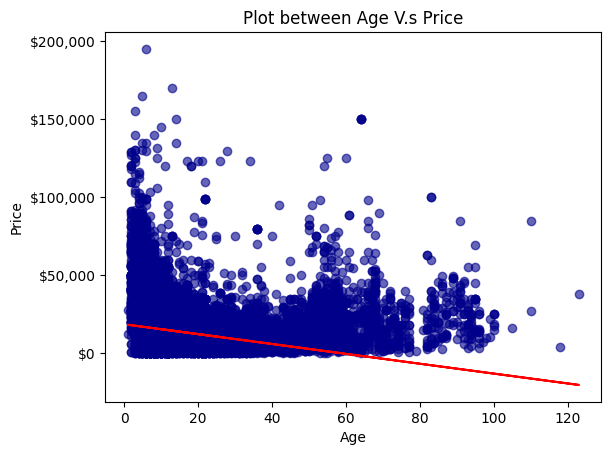

In [17]:
x = df["Age"]
y = df["price"]

fig, ax = plt.subplots()

ax.scatter(x, y, color="darkblue", alpha=0.6)
ax.set_xlabel("Age")
ax.set_ylabel("Price")

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="red")

ax.set_title("Plot between Age V.s Price")
ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])

plt.show()


In [18]:
## Plotting a scatter plot between the age and the price of the vehicles

print("Correlation between Age and Price:", df["Age"].corr(df["price"]))

Correlation between Age and Price: -0.2539022179226213


From the above scatter plot, we can confirm that the price of the vehicle and the age of the vehicle are inversely proportional. We can also see that the degree to which this relation extends to is about **25%**

## What factors have the greatest influence on price / demand for cars ?

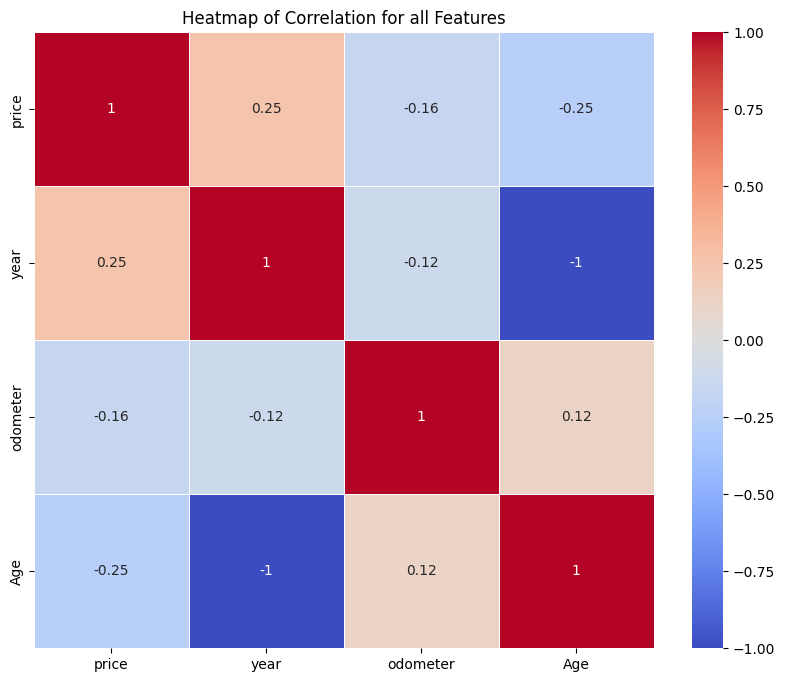

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation for all Features")
plt.show()

From the above heatmap, we can say that the **price**, which can also be represented as a factor of demand, for vehicles is negatively affected by the **age** of the vehicle and then by the **odometer** reading of the vehicle.